The data shows the information of American colleges and universities in 1995, the detail as below. And we would like to classify good colleges and universities. <br>
[ACollege1995P2.csv] Columns:<br>
app - No. of applicants received<br>
acc - No. of applicants accepted<br>
enrol - No. of new students enrolled<br>
ftime - No. of full-time undergraduates<br>
ptime - No. of part-time undergraduate<br>
instate - In-state tuition<br>
outstate - Out-state tuition<br>
rbcost - Room and board cost<br>
bkcost - Estimated book cost<br>
phd - % of faculty with Ph.D.<br>
sfratio - Student/faculty ratio<br>
expend - Instructional expenditure per student<br>
grad - Graduation rate<br>
good (skip) - With 30%+ new students from top 10% high school class.

In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../ACollege1995P2.csv')

In [2]:
scaler = preprocessing.StandardScaler().fit(data)

In [3]:
sdata = pd.DataFrame(scaler.transform(data), columns=data.columns)

In [4]:
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=852).fit(sdata)
    silhouette_avg = metrics.silhouette_score(sdata, kmeans.labels_)
    print('k =', i, ', score =', silhouette_avg)

k = 2 , score = 0.315534356531
k = 3 , score = 0.248920619257
k = 4 , score = 0.187312948391
k = 5 , score = 0.17641960649
k = 6 , score = 0.15397935991


In [5]:
# 2 clusters get better score, but the following measures with k = 3 ,
# because Clustering/R_Example/R_Example_02_K_Means.ipynb
kmeans = KMeans(n_clusters=3, random_state=852).fit(sdata)

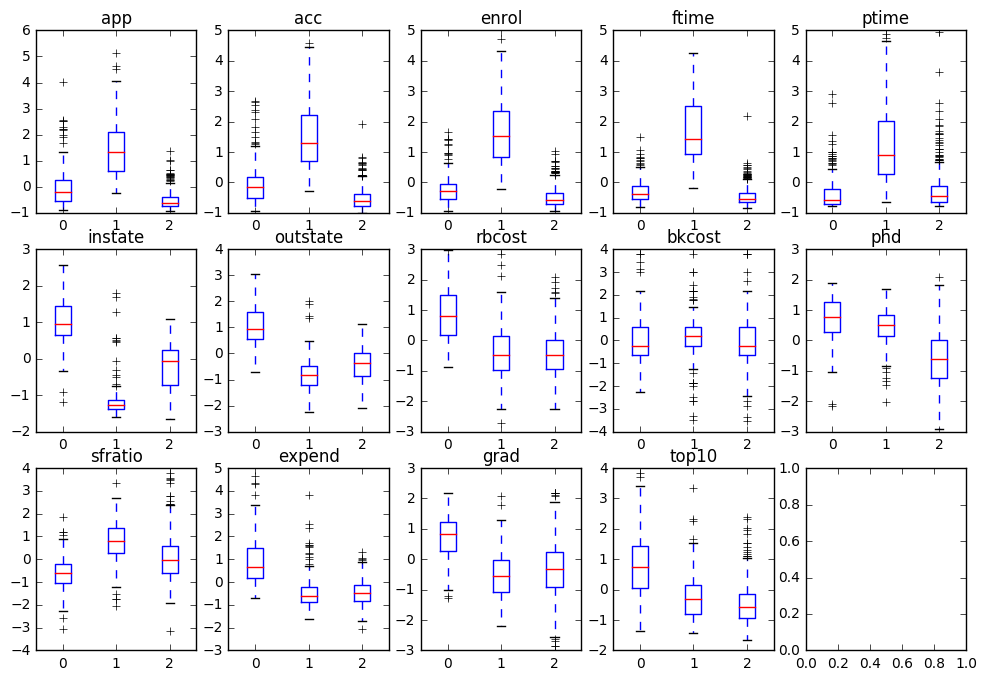

In [6]:
f, axarr = plt.subplots(3, 5,figsize=(12,8))

j = 0
for i in sdata.columns:
    k = int(j / 5)
    l = j % 5
    data_plot = [sdata[i][kmeans.labels_==0], sdata[i][kmeans.labels_==1], sdata[i][kmeans.labels_==2]]
    axarr[k, l].boxplot(data_plot, labels=[0,1,2])
    axarr[k, l].set_title(i)
    j += 1

plt.show()